# Age Estimation

In [1]:
import os
import numpy as np
import torch
from helperT import *

In [2]:
# !pip install imgaug

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism. 

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)] 
    val_loader        -- tensor,(y, x), [(32),(32, 2048)] 
    test_loader       -- tensor,(y, x), [(32),(32, 2048)] 
```

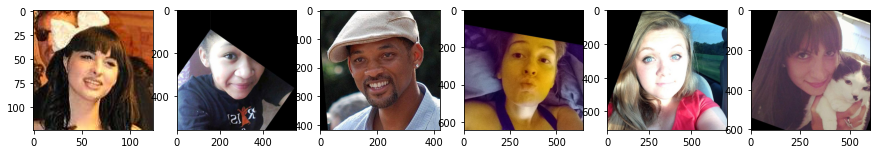

In [3]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results 
```


In [4]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out = self.linear(x)
        return out

In [5]:
## Test ##
model = LinearClassifier(10, 2)
x = torch.zeros((5, 10))
y = model(x)
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

test passed


# softmax + CELoss

=> training finished


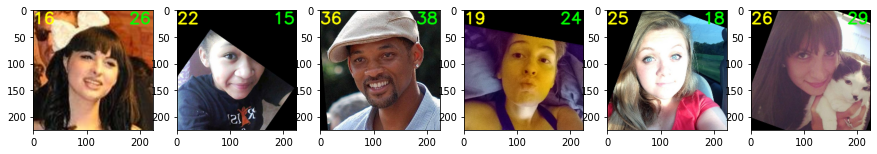

In [6]:
def train_softmax_cel():
    # Define model
    num_inputs = 2048
    num_outputs = 101
    model = LinearClassifier(num_inputs, num_outputs)
    
    # Define SGD optimizer to update our weights and bias
    lr = 0.1
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Define criterion to calculate loss
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(EPOCH):
        # Training model
        model.train()

        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            x, y = x.cuda().float(), y.cuda().long()
            outputs = model(x)
            # calculate the gradient and update the model
            optimizer.zero_grad()
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

       # Validating model
        model.eval()
        gt = []
        preds = []

        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            ############################################# 
            # Calculate the validation outputs and error
            x, y = x.cuda().float(), y.cuda().long() 
            outputs = model(x)
            loss = criterion(outputs, y)

            # Save the predictions for validation sets and ground truth
            pred_age = np.argmax(F.softmax(outputs, dim=-1).cpu().detach().numpy(), axis=1)
            preds.append(pred_age)
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)

        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        
    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

# Test and Generate results file

In [7]:
prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])

Test results has saved to softmax_cel.txt
[25.51687051 61.24368421 50.77903314 21.17792284 30.90236532 35.28523233
 49.11728281 40.71832    22.17682966 57.25754028]
